In [2]:
%matplotlib inline

In [14]:
import os
import json
import csv
import matplotlib
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

In [15]:
user_abspath = os.path.abspath("../data/user.csv")
df = pd.read_csv(user_abspath)

In [16]:
df.head()

,average_stars,compliments,elite,fans,friends,name,review_count,user_id,votes,yelping_since
0,4.14,"{'profile': 8, 'writer': 9, 'cute': 15, 'plain...","[2005, 2006]",69,"['rpOyqD_893cqmDAtJLbdog', '4U9kSBLuBDU391x6bx...",Russel,108,18kPq7GPye-YQ3LyKyAZPw,"{'funny': 167, 'cool': 246, 'useful': 282}",2004-10
1,3.67,"{'profile': 117, 'writer': 346, 'list': 38, 'c...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1345,"['18kPq7GPye-YQ3LyKyAZPw', '4U9kSBLuBDU391x6bx...",Jeremy,1292,rpOyqD_893cqmDAtJLbdog,"{'funny': 8399, 'cool': 12091, 'useful': 15242}",2004-10
2,3.68,"{'profile': 9, 'writer': 24, 'list': 4, 'cute'...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",105,"['18kPq7GPye-YQ3LyKyAZPw', 'rpOyqD_893cqmDAtJL...",Michael,395,4U9kSBLuBDU391x6bxU-YA,"{'funny': 722, 'cool': 657, 'useful': 1349}",2004-10
3,4.64,{'cute': 2},[],2,"['18kPq7GPye-YQ3LyKyAZPw', 'rpOyqD_893cqmDAtJL...",Ken,11,fHtTaujcyKvXglE33Z5yIw,"{'funny': 1, 'cool': 5, 'useful': 11}",2004-10
4,3.80,"{'writer': 2, 'cute': 2, 'plain': 2, 'cool': 1...",[2005],5,"['rpOyqD_893cqmDAtJLbdog', 'HDQixQ-WZEV0LVPJlI...",Katherine,66,SIBCL7HBkrP4llolm4SC2A,"{'funny': 13, 'cool': 16, 'useful': 37}",2004-10


In [17]:
df['votes'] = df['votes'].apply(lambda x: json.loads(x.replace("'","\"")))

In [18]:
for ele in ['funny','cool','useful']:
    df[ele] = df['votes'].apply(lambda x: x[ele])

In [19]:
df['total_votes'] = df['votes'].apply(lambda x: x['funny'] + x['cool'] +x['useful'])

In [27]:
df_result=df.sort_values(by='total_votes',ascending=False)[['name','funny','cool','useful']][:20].reset_index().drop('index',1)

In [28]:
X=df_result['name'].values

Y_funny=df_result['funny'].values
Y_cool=df_result['cool'].values
Y_useful=df_result['useful'].values

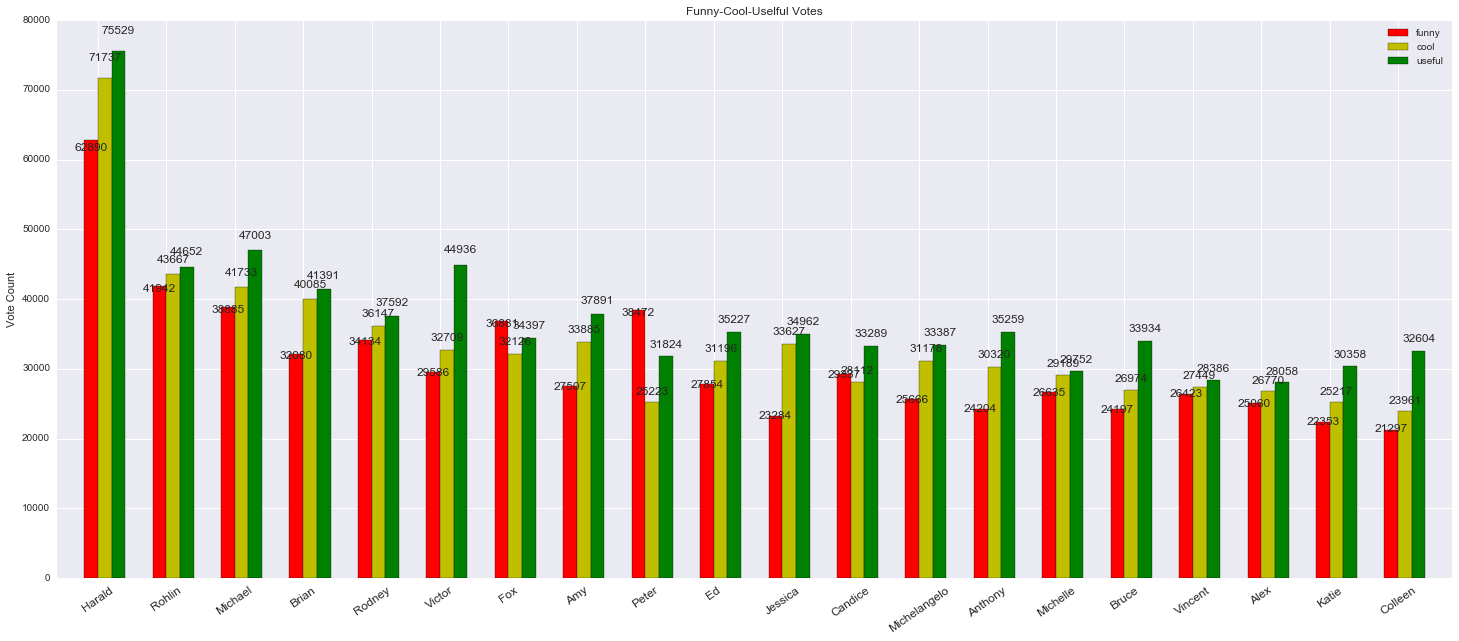

In [29]:
import numpy as np
import matplotlib.pyplot as plt


x= np.arange(20)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure(figsize=(25,10))
ax = plt.subplot(111)

rects1 = ax.bar(x, Y_funny, width, color='r')
rects2 = ax.bar(x + width, Y_cool, width, color='y')
rects3 = ax.bar(x + width + width, Y_useful, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Vote Count')
ax.set_title('Funny-Cool-Uselful Votes')
ax.set_xticks(x + width)
ax.set_xticklabels(X,rotation=35,fontsize=12)

ax.legend((rects1[0], rects2[0], rects3[0]), ('funny', 'cool', 'useful'))


def autolabel(rects, h=1.03):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, h*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1,h=0.97)
autolabel(rects2)
autolabel(rects3)
ax.margins(x=0.02)
plt.show()